# ML Bootcamp: Binary Least Squares

In this lab, we will provide an interactive demonstration of binary least squares, predicting what number is represented by handwritten images of digits 0-9. We will predict whether the number is 0 or nonzero, so we are choosing between two different classes in our classification problem.

Let's first start by loading the data in. We will use the scikit-learn digits dataset as a reference. Each piece of data consists of a representation of a handwritten digit and a label corresponding to the number of the drawn digit.

In [0]:
import numpy as np   # importing Python's lin alg library
from sklearn import datasets  # standard Python datasets


digits = datasets.load_digits() # loading MNIST data
digits_X = digits.data   # the X data
digits_y = digits.target # the y data 

We can visualize some of the examples in our dataset.

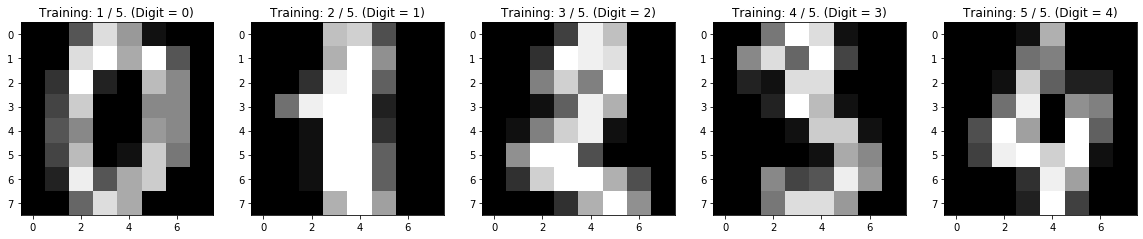

In [0]:
import matplotlib.pyplot as plt # plotting library 

plt.figure(figsize=(20,4))

for i in range(5):
  # get the current X and y
  X_curr, y_curr = digits.data[i], digits.target[i]
  # plot on subplot # (i + 1) of 5 
  plt.subplot(1, 5, i + 1)
  # actually plot the image (cmap = colormap = color for each # between 0, 16.)
  plt.imshow(np.reshape(X_curr, (8, 8)), cmap=plt.cm.gray)
  # title for current image
  plt.title("Training: {} / 5. (Digit = {})".format(i + 1, y_curr), fontsize=12)


As we usually do in machine learning, let's separate our data into a subset to **train** on and a subset to **test** on. 

In [0]:
np.random.seed(100) # set a random seed to make this reproducible 
random_order = np.random.permutation(len(digits_X)) # gets a new order for the dataset

# |with_ex| is the number of test examples
# Precondition: with_ex < 0
with_ex = -10

digits_X_train = digits_X[random_order[:with_ex]] # training everything until the last 10
digits_y_train = digits_y[random_order[:with_ex]] # training everything until the last 10

digits_X_test = digits_X[random_order[with_ex:]] # testing the last 10  
digits_y_test = digits_y[random_order[with_ex:]] # testing the last 10
images_X_test = digits.images[random_order[with_ex:]]

Now, we will use scikit-learn's implementation of linear regression. We will train our model on the training subset, and then use that model to make predictions for our test set.

In [0]:
from sklearn.linear_model import LinearRegression # model in scikit-learn that does linear reg.

model = LinearRegression() # specifying the training loss, picking a way to optimize the loss

After creating the linear regression model, we want to train the model on our training subset. Note that we must change the labels for our dataset to be either 1 or -1. For example, if we have an image of the handwritten digit 0, its label will be 1. If we have an image of the handwritten digit 5, its label will be -1 (not zero).

In [0]:
# Create a binary label set

binary_train_labels = np.where (digits_y_train == 0, np.ones(digits_y_train.shape), -np.ones(digits_y_train.shape))
binary_test_labels = np.where (digits_y_test == 0, np.ones(digits_y_test.shape), -np.ones(digits_y_test.shape))

First, we might be interested in how we would do by just guessing nonzero for all examples in the test set. Let's find out! We can probably expect to get around a 90% accuracy, since the representation of each class in the dataset is fairly equal.




In [0]:
guesses = -np.ones(digits_y_test.shape) # predicting that everything is not zero - since everything but 1 is 0, get 90% accuracy

# a single for-loop
acc = 0.0
for i in range(len(guesses)):
  y = binary_test_labels[i]
  yhat = guesses[i]
  if y == yhat:
    acc += 1.0

# fancy shmancy way of doing it 
acc = sum(1 if y == yhat else 0 for y, yhat in zip(binary_test_labels, guesses)) / binary_test_labels.shape[0]

print("Fraction of examples in test set guessed correctly: {}".format(acc))

Fraction of examples in test set guessed correctly: 0.9


Let's try to do better. We can train the classifier on the training subset.

In [0]:
model.fit(digits_X_train, binary_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print("Theta: {}".format(model.coef_))
print("Intercept: {}".format(model.intercept_))

Theta: [-1.08107698e-17 -2.24576051e-03  4.34968173e-03  1.14490631e-02
 -8.27578014e-03 -1.26530960e-02  7.07558889e-03  4.32477028e-03
  3.67160256e-02 -9.78147601e-03 -2.11004227e-03 -2.19426386e-03
  1.78155211e-02  1.39822652e-02 -7.29044166e-03 -1.80215002e-02
 -2.13234336e-01  8.32373621e-03 -5.17755850e-03  3.09850283e-03
 -7.60346038e-03  1.76417748e-02  5.55662642e-03 -6.54088180e-03
  5.33343729e-02  2.00529196e-02 -1.40875916e-03 -5.59202202e-03
 -2.37199383e-02 -1.47171743e-02  1.65099311e-02  1.84566536e-02
  1.42767742e-15  9.00858351e-03  5.62215376e-03 -1.86053839e-02
 -5.93667491e-03 -1.63195135e-02  2.49432630e-02 -6.52256027e-16
  2.82159995e-03 -1.53263147e-02  1.82360326e-02 -1.77056326e-02
 -2.02165646e-02  2.50784586e-03 -2.03895867e-04 -5.85327370e-03
 -6.54555185e-02 -2.54165262e-02  6.80934374e-03  1.09026176e-02
  1.42319379e-02  3.70188423e-03 -1.66992515e-02  1.90033961e-02
  2.49765412e-01  3.69010362e-03 -8.00782016e-03  1.71729261e-03
 -6.89810985e-03 -

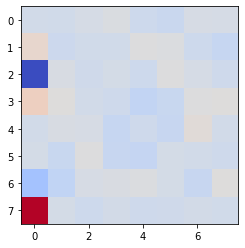

In [0]:
 plt.imshow(np.reshape(model.coef_, (8, 8)), cmap=plt.cm.coolwarm)

With the trained models, we can make predictions on the testing subset. 

In [0]:
preds = model.predict(digits_X_test)
print(preds)
preds = np.sign(preds)
print(preds)

[-0.9274431  -0.81951336 -0.72303583 -0.8027366  -1.12997467 -0.9634221
 -1.01783138  0.8331126  -0.49783581 -1.05089229]
[-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]


Let's now visualize our predictions!

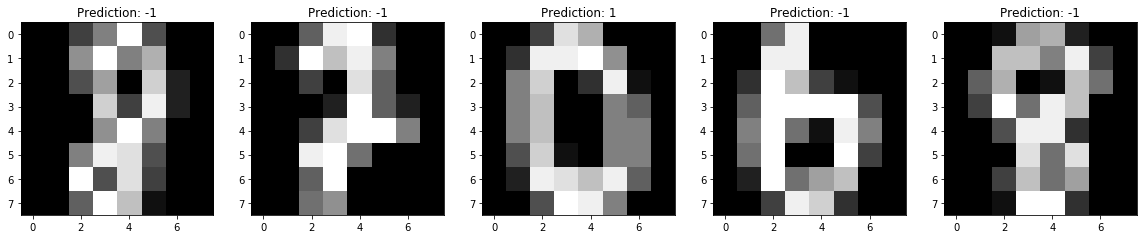

In [0]:
# Plot outputs
images_and_predictions = list(zip(images_X_test, preds))
plt.figure(figsize=(20,4))
for index, (image, prediction) in enumerate(images_and_predictions[5:10]):
    plt.subplot(1, 5, index + 1)
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Prediction: %i' % prediction)

plt.show()

Finally, we can compute our classification accuracy, or the percentage of examples in the test subset classified correctly. The following code snippet computes the accuracy.

In [0]:
# Compute number of examples classified correctly

num_correct = 0
for i in range(len(preds)):
  if preds[i] == binary_test_labels[i]:
    num_correct += 1
    
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))

The fraction of correctly classified examples in the test set is: 1.0


Awesome! But a more interesting problem is: can we predict the exact label for each image, rather than zero vs nonzero? The next lab will go into multiclass least squares classification.